<a href="https://colab.research.google.com/github/nurniahamid/analytics_hr/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan permasalahan departemen Human Resource (HR)

- Nama : Nurnia Hamid
- Email : nurniahamid@gmail.com
- Id Dicoding : a309xaf385

### Menyiapkan Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan digunakan

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
employee = pd.read_csv(url)
employee

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


dari hasil yang ditampilkan data berjumlah :
- 1470 baris dan
- 35 kolom

In [3]:
#cek nama kolom
print(employee.columns)

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Data ini berisi detail demografis, metrik terkait pekerjaan, dan bendera atrisi.

- EmployeeId - Identitas Karyawan
- Attrition - Apakah karyawan mengalami atrisi? (0=tidak, 1=ya)
- Age - Usia karyawan
- BusinessTravel - Komitmen perjalanan untuk pekerjaan
- DailyRate - Gaji harian
- Department - Departemen karyawan
- DistanceFromHome - Jarak dari tempat kerja ke rumah (dalam km)
- Pendidikan - 1-Di bawah Sarjana, 2-Sarjana, 3-Sarjana S1, 4-Magister, 5-Doktor
- EducationField - Bidang Pendidikan
- EnvironmentSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- Gender - Jenis Kelamin Karyawan
- HourlyRate - Gaji Per Jam
- JobInvolvement - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- JobLevel - Tingkat Pekerjaan (1 hingga 5)
- Peran Pekerjaan - Peran Pekerjaan
- Kepuasan Pekerjaan - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- Status Perkawinan - Status Perkawinan
- Gaji Bulanan - Gaji bulanan
- Tarif Bulanan - Tarif bulanan
- Jumlah Perusahaan yang Dikerjakan -Jumlah perusahaan yang pernah bekerja
Di atas 18 - Di atas 18 tahun?
- Lembur - Lembur?
- Persentase Kenaikan Gaji - Persentase kenaikan gaji tahun lalu
- Penilaian Kinerja - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luarr Biasa
- Kepuasan Hubungan - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- Jam Kerja Standar - Jam Kerja Standar
- Tingkat Opsi Saham - Tingkat Opsi Saham
- Total Tahun Bekerja - Total tahun bekerja
- TrainingTimesLastYear - Jumlah pelatihan yang diikuti tahun lalu
- WorkLifeBalance - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Sangat Baik
- YearsAtCompany - Tahun bekerja di perusahaan
- YearsInCurrentRole - Tahun dalam peran saat ini
- YearsSinceLastPromotion - Tahun sejak promosi terakhir
- YearsWithCurrManager - Tahun bekerja dengan manajer saat ini


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
#melihat berapa banyak karyawan yang keluar
print(employee['Attrition'].value_counts(dropna=False))

Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


dari hasil di atas di dapatkan :
- 0.0 (Tidak Keluar) sebanyak 879 karyawan
- 1.0 (Keluar) sebanyaak 179 karyawan
- dan 412 tidak diketahui

kita akan menghapus data NaN dan hanya akan menggunakan data yang memiiki label atau attrition

In [6]:
employee_clean = employee.dropna().copy()

In [7]:
print(employee_clean['Attrition'].value_counts(normalize=True, dropna=False))

Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


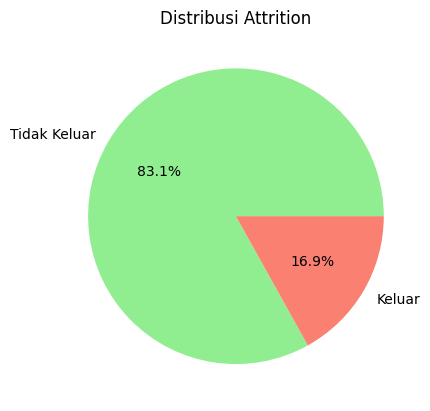

In [8]:
employee_clean['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Tidak Keluar', 'Keluar'], colors=['lightgreen', 'salmon'])
plt.title('Distribusi Attrition')
plt.ylabel('')
plt.show()

dari hasil pie chart di atas dapat dilihat bahwa data attrition sebanyak 16,9% dan itu tergolong signifikan karyawan yang keluar dari perusahaan

#### Analisis Fitur Numerik dan Attrition

In [9]:
columns_num = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears']
employee_clean[columns_num].describe()

,Age,MonthlyIncome,DistanceFromHome,TotalWorkingYears
count,1058.000000,1058.000000,1058.000000,1058.000000
mean,37.055766,6625.945180,8.978261,11.435728
std,9.410421,4837.695042,8.040608,8.016429
min,18.000000,1009.000000,1.000000,0.000000
25%,30.000000,2900.250000,2.000000,6.000000
50%,36.000000,4903.500000,7.000000,10.000000
75%,43.000000,8736.500000,13.000000,16.000000
max,60.000000,19999.000000,29.000000,40.000000


1. Age
- Rata-rata = 37 tahun
- Rentang usia = 18 -60 tahun
- Mayoritas (50%) berusia 30-43 tahun - dikuartil 25-75

2. Monthly Income (Pendapatan bulanan)
- Rata-rata = Rp.6.625.954
- Sebaran (std) = Rp. 4.837.695
- 25% karyawan bergaji < Rp.2.900.000 sednagkan 25% teratas > Rp.8.700.000
- Distribusi pendapatan tidak merata. ada kemungkinan gap antara level jabatan yang besar, yang bisa menyebabkan ketidakpuasan kerja, terutama kelompok gaji rendah.

3. Distance From Home
- Rata-rata = 9 km
- Jarak maksimum = 29 km
- 50% karyawan tinggal < 7 km dari kantor

4. Total Working Years (Total Tahun Kerja)
- Rata-rata = 11 tahun
- Kisaran = 0 - 40 tahun
- 25% karyawan memiliki pengalaman < 6 tahun

Insightnya :
- Ada ketimpangan distribusi gaji dan pengalaman kerja yang signifikan.
- Kelompok muda, bergaji rendah, dan pengalaman kerja pendek bisa menjadi populasi paling berisiko untuk attrition.
- Faktor jarak dan usia juga bisa berperan, walau tidak sekuat pengaruh penghasilan dan pengalaman kerja.




In [10]:
employee_clean['Attrition'] = employee_clean['Attrition'].astype(int)

In [11]:
employee_clean.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


<ipython-input-12-3766233146>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_temp, x='Attrition_str', y=col, palette=attrition_palette_box)
<ipython-input-12-3766233146>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_temp, x='Attrition_str', y=col, palette=attrition_palette_box)
<ipython-input-12-3766233146>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_temp, x='Attrition_str', y=col, palette=attrition_palette_box)
<ipython-input-12-3766233146>:15: FutureWarning: 

Passing `palette` without assigning `

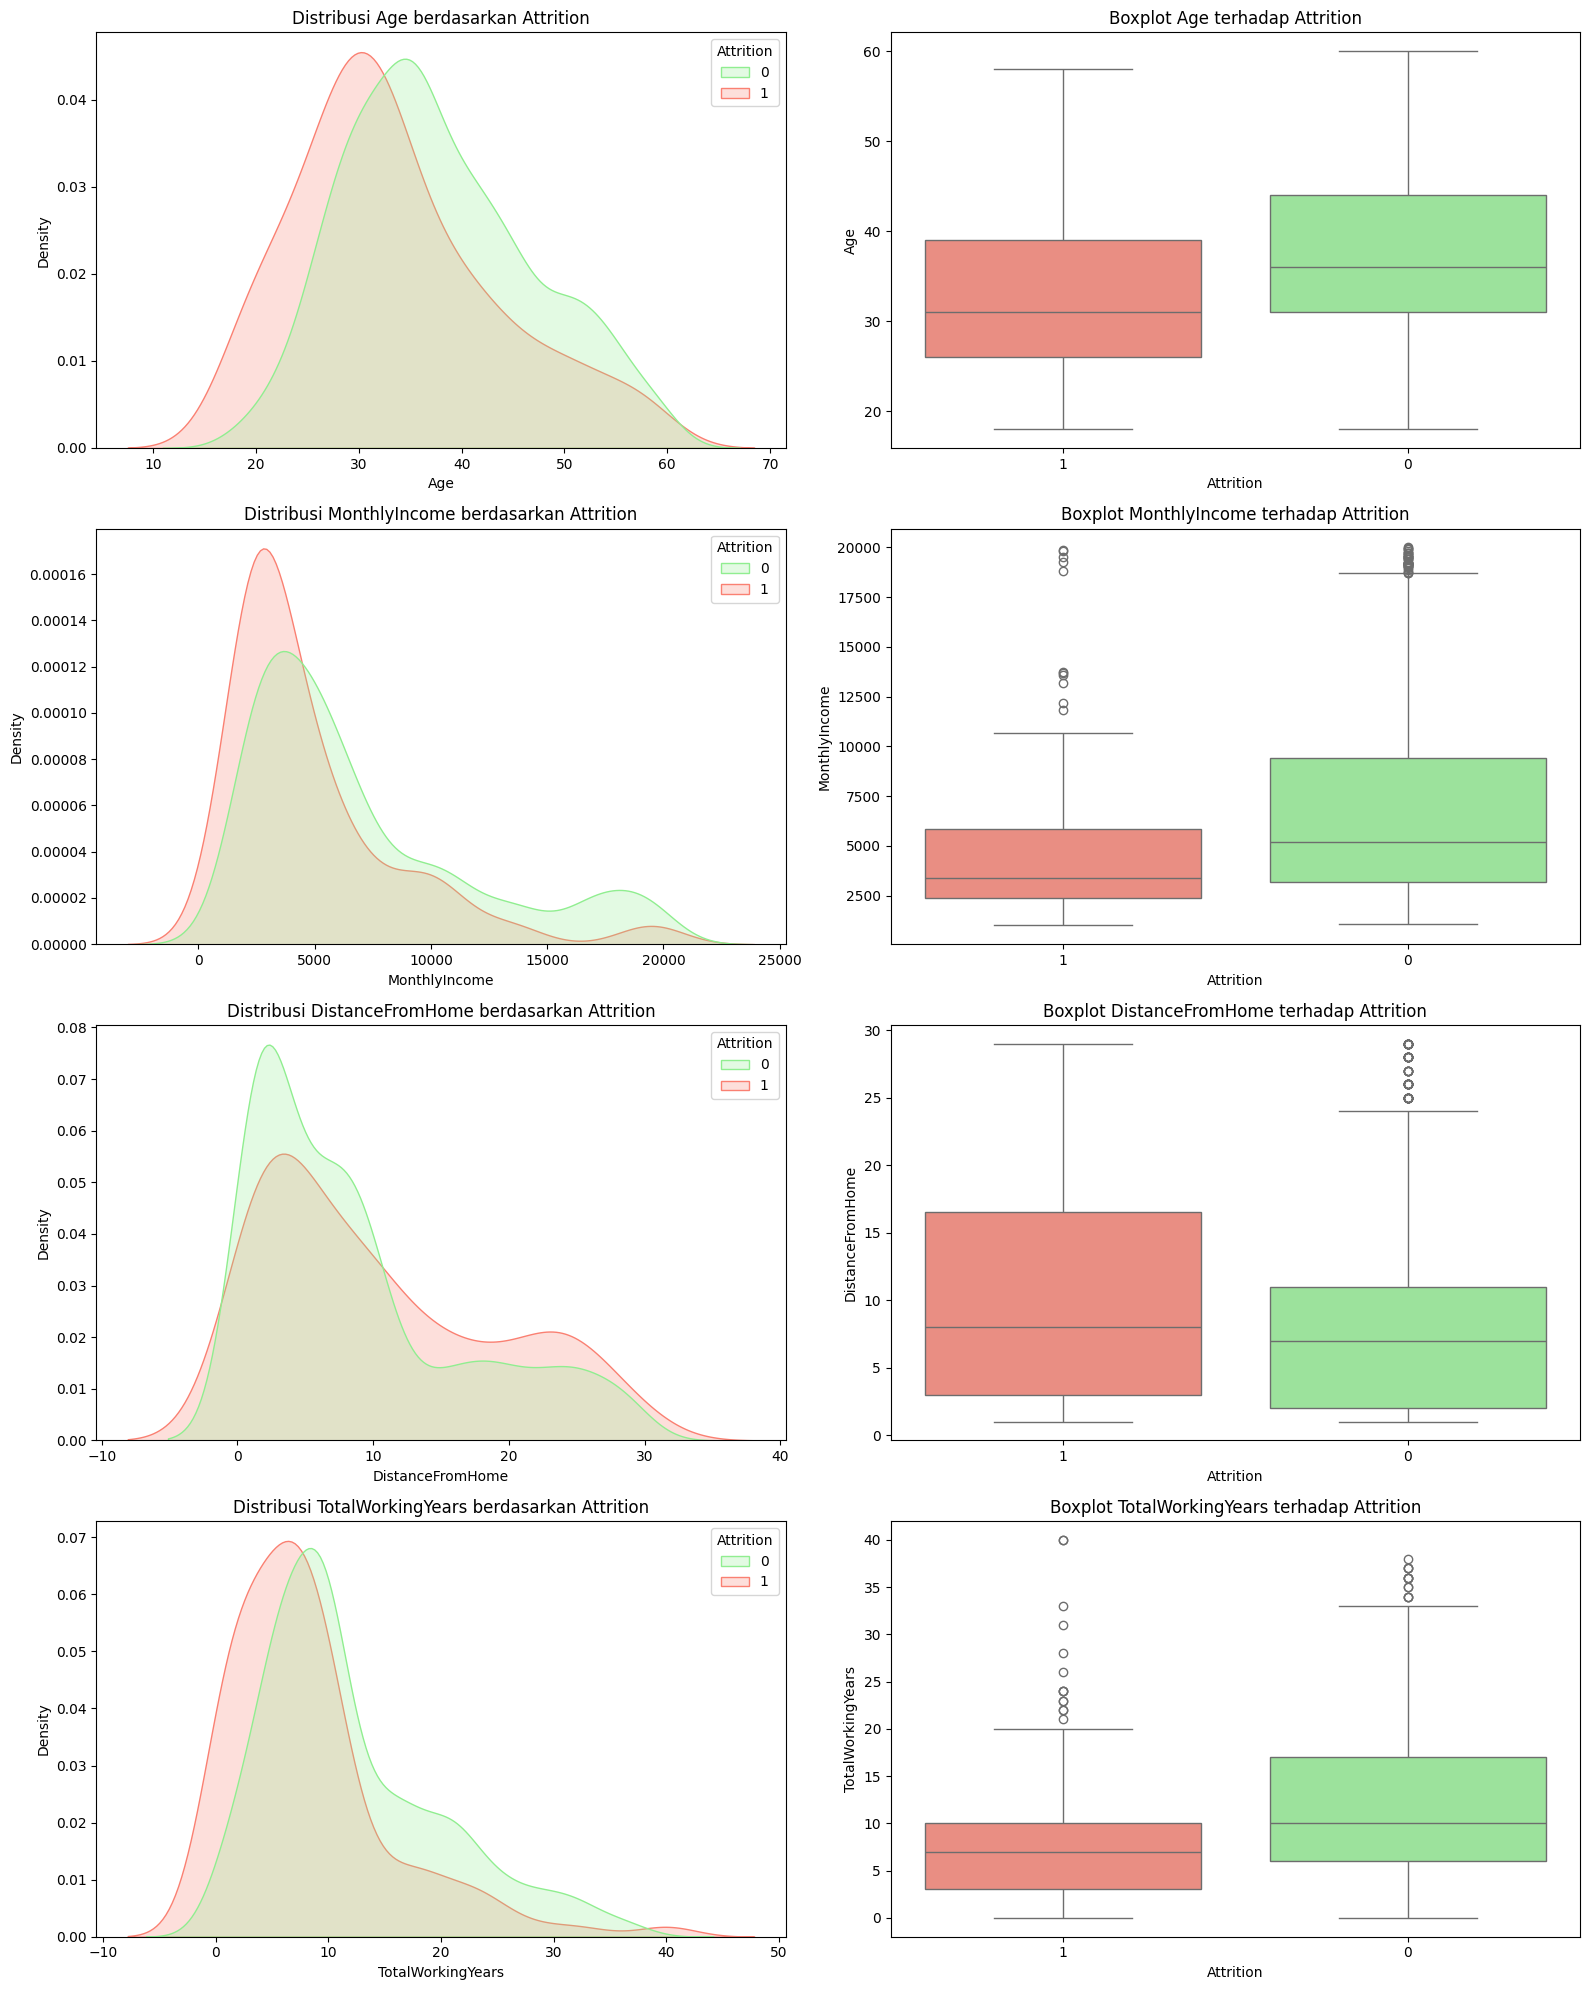

In [12]:
attrition_palette_kde = {0: 'lightgreen', 1: 'salmon'}
attrition_palette_box = {'0': 'lightgreen', '1': 'salmon'}

plt.figure(figsize=(16, len(columns_num)*5))

for i, col in enumerate(columns_num):
    plt.subplot(len(columns_num), 2, 2*i+1)
    sns.kdeplot(data=employee_clean, x=col, hue='Attrition', common_norm=False, fill=True, palette=attrition_palette_kde)
    plt.title(f'Distribusi {col} berdasarkan Attrition')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.subplot(len(columns_num), 2, 2*i+2)
    data_temp = employee_clean.assign(Attrition_str=employee_clean['Attrition'].astype(str))
    sns.boxplot(data=data_temp, x='Attrition_str', y=col, palette=attrition_palette_box)
    plt.title(f'Boxplot {col} terhadap Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [13]:
# Menghitung rata-rata pendapatan bulanan berdasarkan attrition
employee_clean.groupby('Attrition')['MonthlyIncome'].mean()

,MonthlyIncome
Attrition,
0,6982.928328
1,4872.938547


In [14]:
avg_income_by_attrition = employee_clean.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()
avg_income_by_attrition.columns = ['Attrition', 'AverageMonthlyIncome']
display(avg_income_by_attrition)


,Attrition,AverageMonthlyIncome
0,0,6982.928328
1,1,4872.938547


In [15]:
avg_income_by_attrition.to_csv('avg_income_by_attrition.csv', index=False)

- kolom Age
  - Karyawan yang keluar cenderung lebih muda dibanding yang bertahan
  - kalau dari boxplot Median karywan yang keluar lebih rendah dan rentang usia mereka lebih muda secara keseluruhan
  - jadi karyawan yang lebih muda lebih beresiko untuk keluar dari perusahaan
- Kolom MonthlyIncome
  - Karyawan yang keluar cenderung memiliki pendapatan bulanan yang lebih rendah dibandingkan karyawan yang bertahan
  - kalau dari boxplot Median pendapatan karyawan yang keluar lebih rendah, ada banyak outlier pendapatan tinggi tapi mereka tetap keluar
  - Pendapatan rendah bisa jadi faktor yang membuat karyawan memutuskan keluar
- Kolom DistanceFromHome
  - Karyawan yang keluar cenderung memiliki jarak tempuh yang lebih jauh dari rumah ke kantor
  - Median jarak untuk yang keluar lebih besar dibanding yang bertahan
  - Jarak yang lebih jauh mungkin menambah beban dan mempengaruhi keputusan keluar
- Kolom TotalWorkingYears
  - Karyawan yang keluar cenderung memiliki pengalaman kerja yang lebih sedikit dibanding karyawan yang bertahan
  - Median total pengalaman kerja karyawan yang keluar lebih rendah, mereka biasanya adalah karyawan dengan pengalaman kerja muda.
  - Karyawan dengan pengalaman kerja lebih sedikit lebih rentan untuk keluar
  

#### Analisis Variabel Kategori vs Attrition

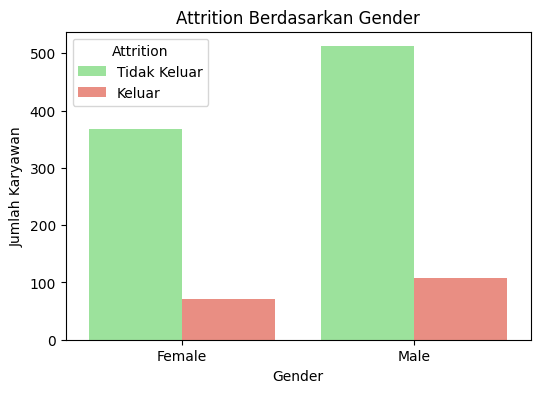

In [16]:
# Gender vs atrrition
plt.figure(figsize=(6, 4))
sns.countplot(data=employee_clean, x='Gender', hue='Attrition', palette=['lightgreen', 'salmon'])
plt.title('Attrition Berdasarkan Gender')
plt.ylabel('Jumlah Karyawan')
plt.xlabel('Gender')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.show()

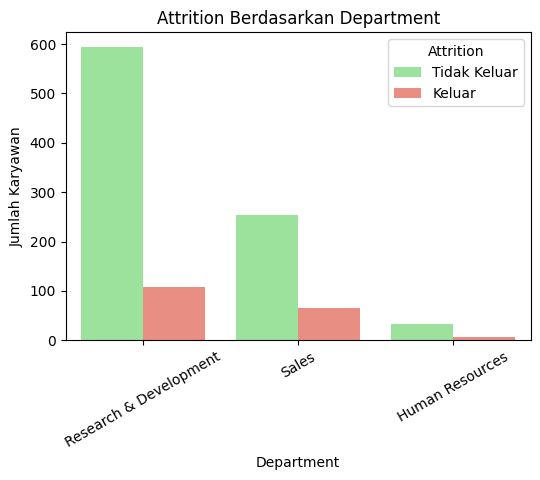

In [17]:
# Attrition berdasarkan Departement
plt.figure(figsize=(6, 4))
sns.countplot(data=employee_clean, x='Department', hue='Attrition', palette=['lightgreen', 'salmon'])
plt.title('Attrition Berdasarkan Department')
plt.ylabel('Jumlah Karyawan')
plt.xlabel('Department')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.xticks(rotation=30)
plt.show()

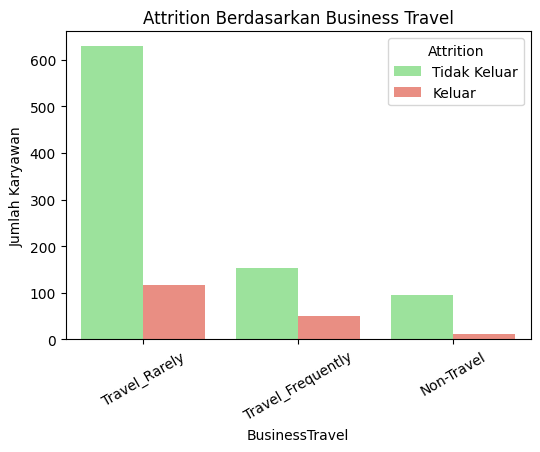

In [18]:
# Attrition berdasarkan Bussines Travel
plt.figure(figsize=(6, 4))
sns.countplot(data=employee_clean, x='BusinessTravel', hue='Attrition', palette=['lightgreen', 'salmon'])
plt.title('Attrition Berdasarkan Business Travel')
plt.ylabel('Jumlah Karyawan')
plt.xlabel('BusinessTravel')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.xticks(rotation=30)
plt.show()

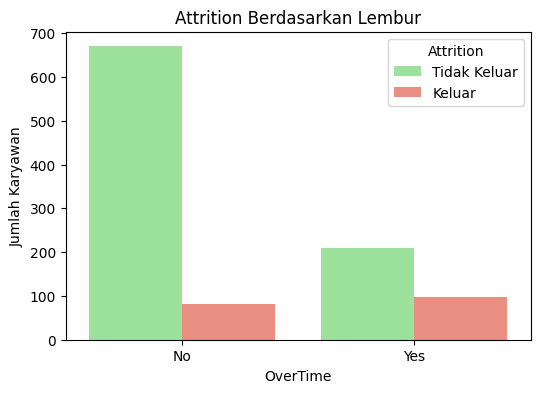

In [19]:
# Attrition berdasarkan Overtime
plt.figure(figsize=(6, 4))
sns.countplot(data=employee_clean, x='OverTime', hue='Attrition', palette=['lightgreen', 'salmon'])
plt.title('Attrition Berdasarkan Lembur')
plt.ylabel('Jumlah Karyawan')
plt.xlabel('OverTime')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.show()


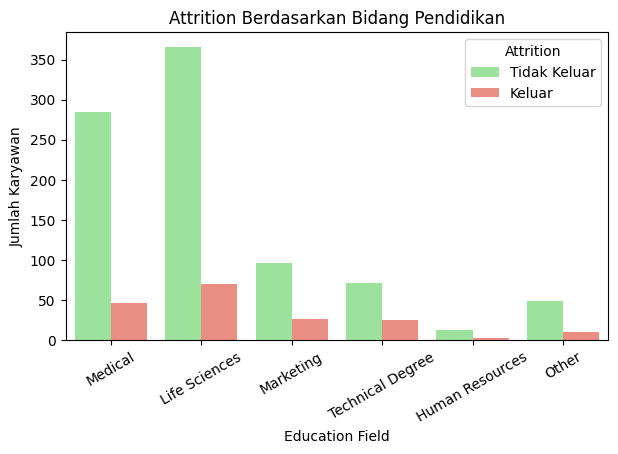

In [20]:
# Attrition Berdasarkan EducationField
plt.figure(figsize=(7, 4))
sns.countplot(data=employee_clean, x='EducationField', hue='Attrition', palette=['lightgreen', 'salmon'])
plt.title('Attrition Berdasarkan Bidang Pendidikan')
plt.ylabel('Jumlah Karyawan')
plt.xlabel('Education Field')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.xticks(rotation=30)
plt.show()

In [21]:
def plot_stacked_attrition(df, col):
    prop_df = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
    prop_df = prop_df[[0, 1]]  # urutan: Tidak Keluar, Keluar
    prop_df.columns = ['Tidak Keluar', 'Keluar']

    prop_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(7, 4))
    plt.title(f'Proporsi Attrition berdasarkan {col}')
    plt.ylabel('Persentase')
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.xticks(rotation=30)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


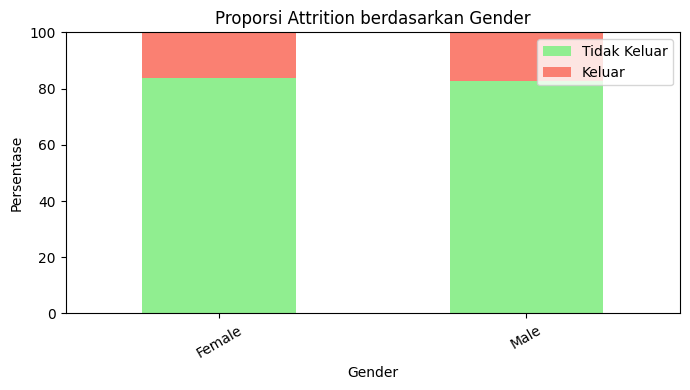

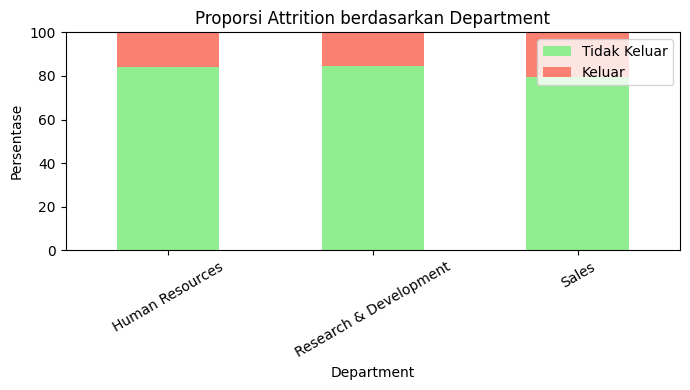

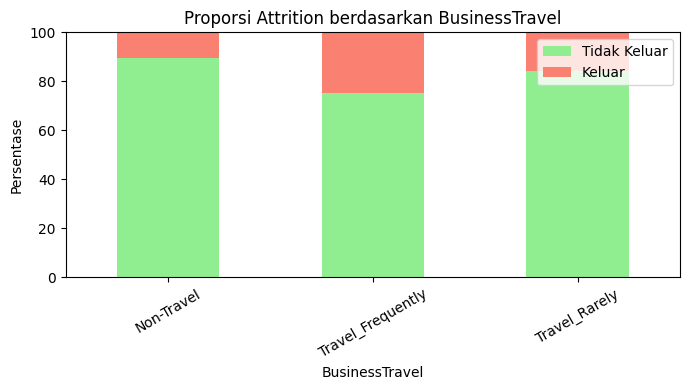

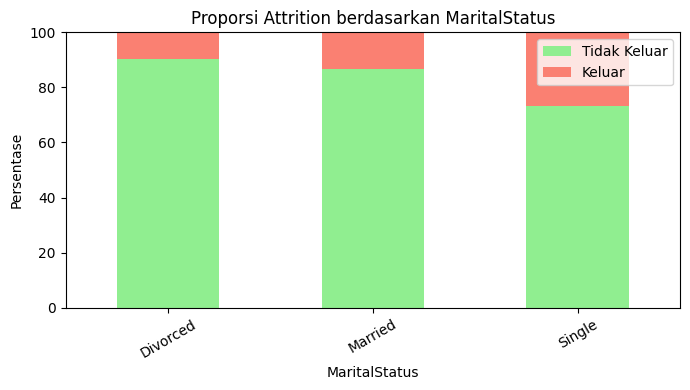

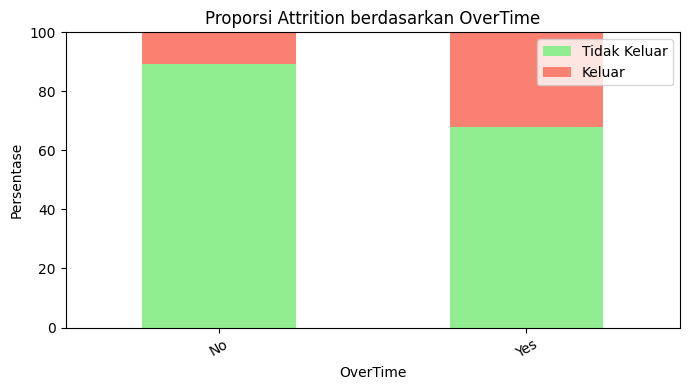

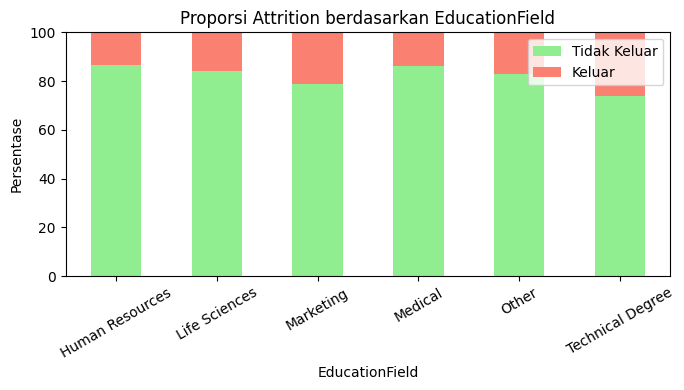

In [22]:
kategori_cols = ['Gender', 'Department', 'BusinessTravel', 'MaritalStatus', 'OverTime', 'EducationField']

for col in kategori_cols:
    plot_stacked_attrition(employee_clean, col)


- Gender bukanlah faktor dominan dalam keputusan attrition
- Tiga departemen (HR, R&D, Sales) punya proporsi attrition yang relatif serupa. Artinya: Jenis departemen belum menunjukkan perbedaan signifikan dalam kecenderungan attrition
- Karyawan yang sering bepergian ("Travel_Frequently") punya tingkat attrition lebih tinggi daripada yang jarang atau tidak pernah bepergian
- Karyawan dengan status Single punya proporsi keluar yang lebih tinggi dibanding yang Menikah atau Bercerai
- Ini adalah faktor paling jelas: Karyawan yang lembur (OverTime = Yes) memiliki proporsi keluar yang jauh lebih tinggi
- Bidang pendidikan Marketing dan Technical Degree menunjukkan tingkat keluar yang relatif lebih tinggi

#### Analisis Korelasi antar Fitur Numerik

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(employee_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


Analisis Interaksi antar fitur

In [ ]:
pd.crosstab(employee_clean['JobRole'], employee_clean['OverTime'], values=employee_clean['Attrition'], aggfunc='mean')


- Overtime sangat Mempengaruhi attrition
- hampir semua JobRole menunjukkan bahwa rata-rata atrrition jauh lebih tinggi saat OverTime
- Misalnya Sales Reprentative
  - OverTime No - Attrition 29%
  - Overtime Yes - Attrition 76%
- jadi karyawan yang lembur (OverTime = Yes) 3-5 kali lebih mungkin untuk resign dalam beberapa peran

In [ ]:
crosstab_result = pd.crosstab(
    employee_clean['JobRole'],
    employee_clean['OverTime'],
    values=employee_clean['Attrition'],
    aggfunc='mean'
)
crosstab_result.to_csv('attrition_by_jobrole_overtime.csv')


In [ ]:
sns.scatterplot(data=employee_clean, x='Age', y='MonthlyIncome', hue='Attrition')


dapat dilihat pada scatter plot bahwa karyawan dengan umur lebih muda dan gaji rendah lebih banyak attrition

In [ ]:
scatter_df = employee_clean[['Age', 'MonthlyIncome', 'Attrition']]
scatter_df.to_csv('scatter_points.csv', index=False)


#### Chi-Square Test untuk Fitur Kategorikal

Untuk mengetahui apakah distribusi kategori fitur (misal Gender, JobRole, MaritalStatus) signifikan berbeda terhadap Attrition.





In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(employee_clean['OverTime'], employee_clean['Attrition'])
chi2, p, _, _ = chi2_contingency(table)
print("P-Value:", p)


In [ ]:
cat_features = ['Gender', 'MaritalStatus', 'JobRole', 'OverTime', 'Department', 'BusinessTravel', 'EducationField']

for col in cat_features:
    table = pd.crosstab(employee_clean[col], employee_clean['Attrition'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col}: P-Value = {p:.4f}")


Fitur yang signifikan (p-value < 0..05)
- MaritalStatus 0.0000 - Status pernikahan memengaruhi keputusan resign.
- JobRole 0.0000 - 	Tipe pekerjaan berhubungan dengan attrition
- OverTime 0.0000 - Sangat signifikan. Lembur mendorong karyawan untuk resign.
- BussinesTravel - 0.0012 Karyawan yang sering bepergian cenderung lebih mudah resign

Keempat fitur di atas akan kita masukkan ke dalam model prediksi karena punya hubungan kuat dengan attrition

Fitur yang tidak Signifikan (p-value ≥ 0.05)
- Gender - 0.6646 Jenis kelamin tidak berpengaruh signifikan terhadap attrition.
- Departement 0.0989 Perbedaan antar departemen tidak cukup kuat untuk menjelaskan attrition.
- EducationField 0.0808 Bidang pendidikan tidak terlalu memengaruhi keputusan resign

# Kesimpulan :

Faktor-Faktor yang mempengaruhi Attrion rate =
1. Overtime (Lembur)
Karyawan yang sering lembur memiliki kemungkinan 3–5 kali lebih tinggi untuk mengalami attrition dibanding yang tidak lembur. Ini menunjukkan bahwa beban kerja berlebih dapat berdampak negatif terhadap kepuasan dan keseimbangan hidup.

2. Monthly Income (Gaji Bulanan) Karyawan dengan pendapatan lebih rendah cenderung lebih tinggi tingkat attrition-nya. Ketidakpuasan terhadap kompensasi menjadi faktor penting dalam keputusan untuk keluar.

3. Age (Usia)
Karyawan lebih muda (terutama di bawah 30 tahun) memiliki tingkat attrition lebih tinggi. Mereka cenderung lebih mobile secara karier dan mencari peluang yang lebih sesuai dengan aspirasi mereka.

4. Marital Status (Status Pernikahan)  Karyawan yang belum menikah (single) memiliki kecenderungan lebih tinggi untuk keluar. Mereka cenderung lebih fleksibel dan memiliki komitmen yang lebih rendah terhadap organisasi jangka panjang.

5. Travel Frequency (Frekuensi Perjalanan Dinas)
Karyawan yang sering melakukan perjalanan bisnis menunjukkan tingkat attrition yang lebih tinggi, kemungkinan karena kelelahan, stress, dan work-life imbalance.

6. DistanceFromHome (Jarak dari rumah ke kantor)
Karyawan yang tinggal lebih jauh dari kantor memiliki kemungkinan lebih tinggi untuk keluar, yang menunjukkan bahwa jarak tempuh harian dapat menjadi beban tambahan yang berpengaruh terhadap retensi.


# Rekomendasi

1. Terapkan Program Manajemen Beban Kerja & Work-Life Balance
- Batasi lembur dengan kebijakan tegas dan pantauan berkala.
- Sediakan opsi kerja fleksibel (remote/hybrid).
- Promosikan budaya kerja sehat dengan jam kerja yang wajar.

2. Evaluasi dan Penyesuaian Skema Kompensasi
- Lakukan benchmarking gaji secara berkala.
- Buat insentif tambahan untuk karyawan dengan performa tinggi/Lembur.
- Tawarkan benefit non-finansial seperti cuti tambahan, pelatihan karier, atau program kesejahteraan.

3. Bangun Strategi Retensi Karyawan Muda dan Single
- Sediakan jalur karier yang jelas dan cepat untuk karyawan muda.
- Berikan kesempatan belajar dan berkembang (misalnya sertifikasi, pelatihan).
- Perkuat engagement melalui mentoring dan komunitas internal.

4. Kelola Beban Perjalanan Bisnis
- Evaluasi ulang kebutuhan perjalanan dinas yang berlebihan.
- Berikan kompensasi khusus atau fleksibilitas waktu bagi karyawan yang sering dinas.
- Gunakan alternatif digital seperti video conference bila memungkinkan.

5. Dukungan Transportasi dan Lokasi
- Sediakan fasilitas antar-jemput atau subsidi transportasi untuk karyawan yang tinggal jauh.
- Pertimbangkan kebijakan kerja hybrid untuk mengurangi waktu perjalanan.
- Petakan sebaran tempat tinggal karyawan untuk merancang solusi transportasi yang efisien.



In [ ]:
employee_clean.to_csv('employee_clean.csv', index=False)